In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_split=round(len(df)*0.20)

In [ ]:
test_split

1200

In [ ]:
df_for_training=df.iloc[:-1200]
df_for_testing=df.iloc[-1200:]

In [ ]:
print(df_for_training.shape)
print(df_for_testing.shape)

(4801, 12)
(1200, 12)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [ ]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [ ]:
df_for_training_scaled.shape

(4801, 12)

In [ ]:
df_for_testing_scaled.shape

(1200, 12)

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
trainX,trainY=createXY(df_for_training_scaled,100)

In [ ]:
testX,testY=createXY(df_for_testing_scaled,100)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(100,12)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [16,20],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

<ipython-input-23-46cf2383d924>:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [ ]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/16
147/147 [==============================] - 7s 17ms/step - loss: 0.0333 - val_loss: 0.1259
Epoch 2/16
147/147 [==============================] - 2s 12ms/step - loss: 0.0081 - val_loss: 0.1056
Epoch 3/16
147/147 [==============================] - 2s 12ms/step - loss: 0.0066 - val_loss: 0.0955
Epoch 4/16
147/147 [==============================] - 2s 15ms/step - loss: 0.0058 - val_loss: 0.0854
Epoch 5/16
147/147 [==============================] - 3s 17ms/step - loss: 0.0058 - val_loss: 0.0776
Epoch 6/16
147/147 [==============================] - 2s 12ms/step - loss: 0.0055 - val_loss: 0.0822
Epoch 7/16
147/147 [==============================] - 2s 12ms/step - loss: 0.0052 - val_loss: 0.0693
Epoch 8/16
147/147 [==============================] - 2s 12ms/step - loss: 0.0047 - val_loss: 0.0714
Epoch 9/16
147/147 [==============================] - 2s 12ms/step - loss: 0.0045 - val_loss: 0.0672
Epoch 10/16
147/147 [==============================] - 2s 12ms/step - loss: 0.0044 - val_lo

In [ ]:
grid_search.best_params_

{'batch_size': 20, 'epochs': 16, 'optimizer': 'adam'}

In [ ]:
my_model=grid_search.best_estimator_.model

In [ ]:
my_model

In [ ]:
prediction=my_model.predict(testX)

35/35 [==============================] - 1s 6ms/step


In [ ]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.2287853 ]
 [0.23023833]
 [0.23170522]
 ...
 [0.05594319]
 [0.05423987]
 [0.05283345]]

Prediction Shape- (1100, 1)


In [ ]:
prediction.shape

(1100, 1)

In [ ]:
prediction_copies_array = np.repeat(prediction,12, axis=-1)

In [ ]:
prediction_copies_array.shape

(1100, 12)

In [ ]:
prediction_copies_array

array([[0.2287853 , 0.2287853 , 0.2287853 , ..., 0.2287853 , 0.2287853 ,
        0.2287853 ],
       [0.23023833, 0.23023833, 0.23023833, ..., 0.23023833, 0.23023833,
        0.23023833],
       [0.23170522, 0.23170522, 0.23170522, ..., 0.23170522, 0.23170522,
        0.23170522],
       ...,
       [0.05594319, 0.05594319, 0.05594319, ..., 0.05594319, 0.05594319,
        0.05594319],
       [0.05423987, 0.05423987, 0.05423987, ..., 0.05423987, 0.05423987,
        0.05423987],
       [0.05283345, 0.05283345, 0.05283345, ..., 0.05283345, 0.05283345,
        0.05283345]], dtype=float32)

In [ ]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),12)))[:,0]

In [ ]:
pred

array([0.2287853 , 0.23023833, 0.23170522, ..., 0.05594319, 0.05423987,
       0.05283345], dtype=float32)

In [ ]:
original_copies_array = np.repeat(testY,12, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),12)))[:,0]

In [ ]:
pred

array([0.2287853 , 0.23023833, 0.23170522, ..., 0.05594319, 0.05423987,
       0.05283345], dtype=float32)

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [0.2287853  0.23023833 0.23170522 ... 0.05594319 0.05423987 0.05283345]

Original Values--  [1. 1. 1. ... 0. 0. 0.]


In [ ]:
import matplotlib.pyplot as plt

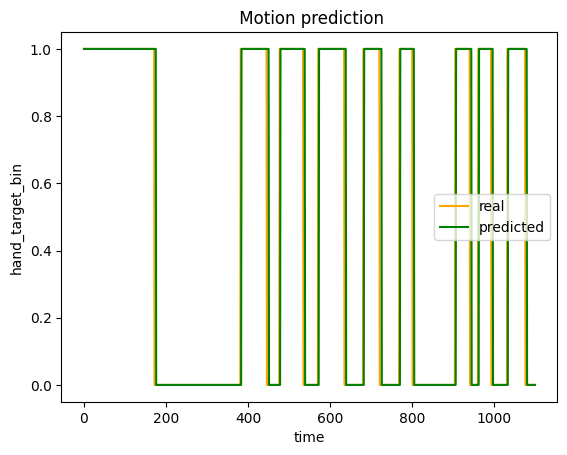

precision: 0.9704797047970479


In [ ]:
from sklearn.metrics import precision_score

low = pred.min()
high = pred.max()
medium = (low+high)/2

pred_copy = pred

for i in range(len(pred_copy)):
    if pred_copy[i] >= medium:
      pred_copy[i] = 1
    else:
      pred_copy[i] = 0

plt.plot(original, color = 'orange', label = 'real')
plt.plot(pred, color = 'green', label = 'predicted')
plt.title(' Motion prediction')
plt.xlabel('time')
plt.ylabel('hand_target_bin')
plt.legend()
plt.show()

print('precision:', precision_score(pred_copy, original))